In [1]:
import sys,cv2, numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
with open(r"filename", 'r') as file:
    raw = file.read().split("\n")

In [11]:
# Test data
raw = ["..@@.@@@@.","@@@.@.@.@@","@@@@@.@.@@","@.@@@@..@.","@@.@@@@.@@",".@@@@@@@.@",".@.@.@.@@@","@.@@@.@@@@",".@@@@@@@@.","@.@.@@@.@."]

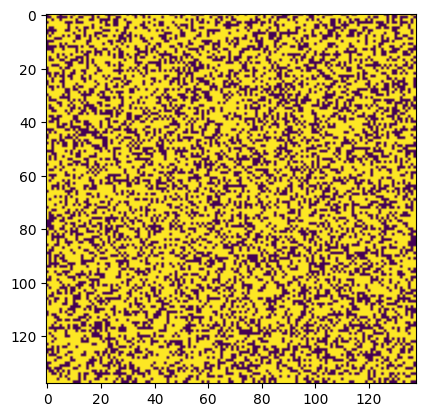

In [20]:
data = np.array([[1 if k=="@" else 0 for k in line] for line in raw if line])
plt.imshow(data)

In [13]:
def removables(data):
    convolution_kernel = np.array([[1, 1, 1], 
                                   [1, 0, 1], 
                                   [1, 1, 1]])
    smoothed = cv2.filter2D(data.astype(np.float32), -1, convolution_kernel,borderType=cv2.BORDER_CONSTANT)
    return data * (smoothed<4)

Part 1: 13


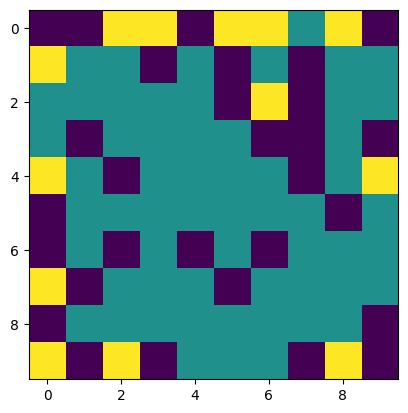

In [14]:
plt.imshow(removables(data)+data)
print(f"Part 1: {np.sum(removables(data))}")

In [21]:
total = 0
imagelist = []
while True:
    removed = removables(data)
    imagelist.append((removed+data).copy())
    if np.sum(removed) == 0:
        break
    total += np.sum(removed)
    data -= removed


Part 2: 8972


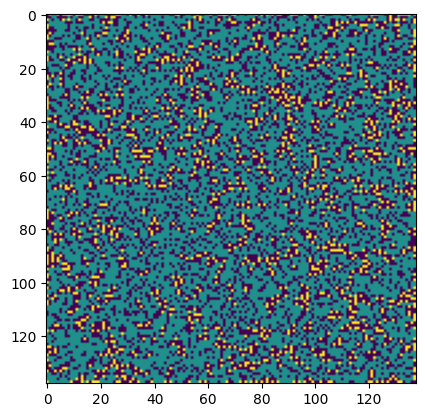

In [26]:
fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(imagelist[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imagelist[j])
    # return the artists set
    return [im]
# kick off the animation

from IPython.display import HTML

ani = animation.FuncAnimation(fig, updatefig, frames=range(len(imagelist)), 
                              interval=50)

writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("day4.gif", writer=writer)

print(f"Part 2: {total}")
HTML(ani.to_jshtml())